<a href="https://colab.research.google.com/github/satya0212/ML-project-for-predicting-Extrovert-and-Introvert/blob/main/Podcast_Listening_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This dataset provides a comprehensive look into the world of podcasts. It includes essential details about individual episodes.

Key features of the dataset include:

- **Podcast and Episode Information**: Names and titles to identify content.
- **Episode Length**: Duration in minutes, a key factor in listener engagement.
- **Genre**: Categorization for understanding content themes.
- **Popularity Metrics**: Data on both host and guest popularity.
- **Publication Details**: Day and time, potentially revealing listening patterns.
- **Advertising and Sentiment**: Number of ads and overall episode sentiment.
- **Listening Time**: A measure of how long listeners engage with an episode.

This dataset is valuable for analyzing trends, listener behavior, and factors influencing podcast success.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#let's take a look to our data
p_data=pd.read_csv('/content/train (1).csv')

In [4]:
p_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
#some basic information about data
p_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [6]:
p_data.shape

(750000, 12)

In [7]:
p_data.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [8]:
p_data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [9]:
p_data['Genre'].value_counts()

,count
Genre,
Sports,87606
Technology,86256
True Crime,85059
Lifestyle,82461
Comedy,81453
Business,80521
Health,71416
News,63385
Music,62743


In [10]:
p_data=p_data.fillna({'Episode_Length_minutes':p_data['Episode_Length_minutes'].mean(),'Guest_Popularity_percentage':p_data['Guest_Popularity_percentage'].mean(),'Number_of_Ads':p_data['Number_of_Ads'].mean()})


In [11]:
p_data=p_data.drop(['id','Episode_Title'],axis=1)

In [12]:
p_data=p_data.replace({'Episode_Sentiment':{'Negative':0,'Positive':1,'Neutral':2},'Publication_Day':{'Monday':0,'Tuesday':1,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},'Genre':{'Sports':0,'Technology':1,'True Crime':2,'Lifestyle':3,'Comedy':4,'Business':5,'Health':6,'News':7,'Music':8,'Education':9},'Publication_Time':{'Night':0,'Afternoon':1,'Evening':2,'Morning':3}})

/tmp/ipython-input-863372794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_data=p_data.replace({'Episode_Sentiment':{'Negative':0,'Positive':1,'Neutral':2},'Publication_Day':{'Monday':0,'Tuesday':1,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},'Genre':{'Sports':0,'Technology':1,'True Crime':2,'Lifestyle':3,'Comedy':4,'Business':5,'Health':6,'News':7,'Music':8,'Education':9},'Publication_Time':{'Night':0,'Afternoon':1,'Evening':2,'Morning':3}})


In [13]:
p_data=p_data.drop(['Podcast_Name'],axis=1)

In [14]:
p_data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,64.504738,2,74.81,4,0,52.236449,0.0,1,31.41998
1,119.800000,4,66.95,6,1,75.950000,2.0,0,88.01241
2,73.900000,9,69.97,1,2,8.970000,0.0,0,44.92531
3,67.170000,1,57.22,0,3,78.700000,2.0,1,46.27824
4,110.510000,6,80.07,0,1,58.680000,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...
749995,75.660000,9,69.36,6,3,52.236449,0.0,0,56.87058
749996,75.750000,5,35.21,6,0,52.236449,2.0,2,45.46242
749997,30.980000,3,78.58,4,3,84.890000,0.0,0,15.26000
749998,108.980000,3,45.39,4,3,93.270000,0.0,0,100.72939


# Data Visualisation

/tmp/ipython-input-205673913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_data['Episode_Length_minutes'])


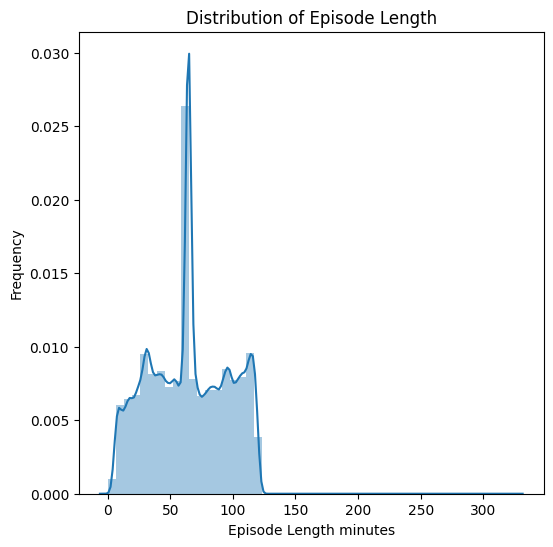

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(p_data['Episode_Length_minutes'])
plt.title('Distribution of Episode Length')
plt.xlabel('Episode Length minutes')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-287647066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_data['Listening_Time_minutes'])


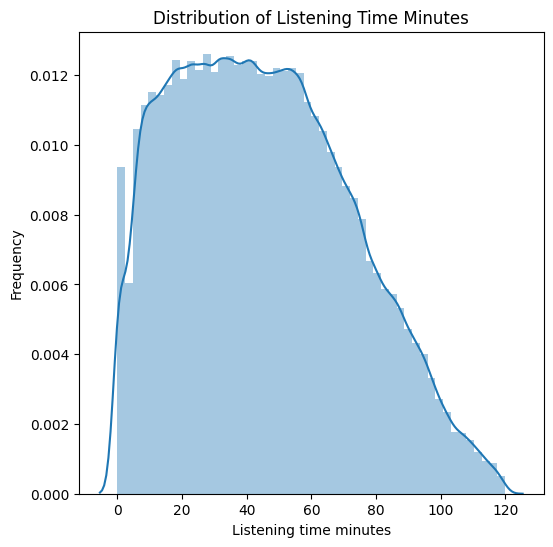

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(p_data['Listening_Time_minutes'])
plt.title('Distribution of Listening Time Minutes')
plt.xlabel('Listening time minutes')
plt.ylabel('Frequency')
plt.show()

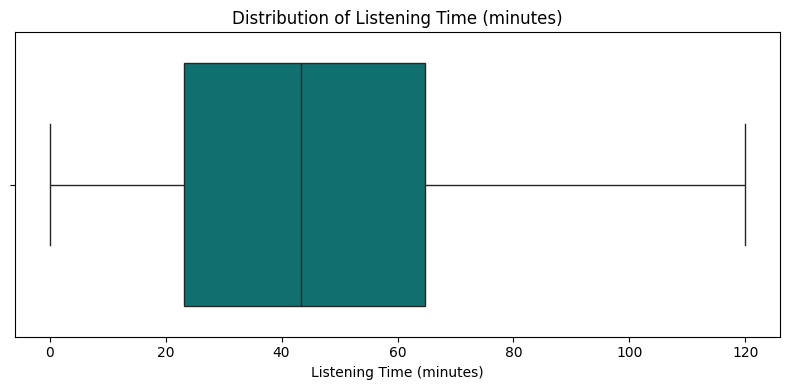

In [45]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=p_data["Listening_Time_minutes"], color='teal')
plt.title("Distribution of Listening Time (minutes)")
plt.xlabel("Listening Time (minutes)")
plt.tight_layout()
plt.show()

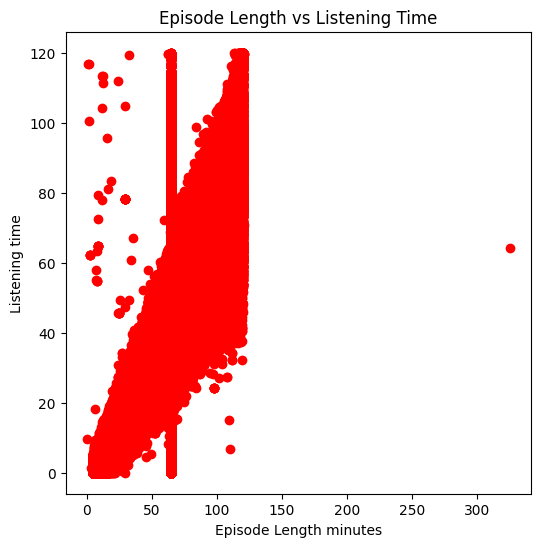

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(p_data['Episode_Length_minutes'],p_data['Listening_Time_minutes'],color='red')
plt.title('Episode Length vs Listening Time')
plt.xlabel('Episode Length minutes')
plt.ylabel('Listening time')
plt.show()

we can say that there is a linear relationship between episode length and listening time


<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


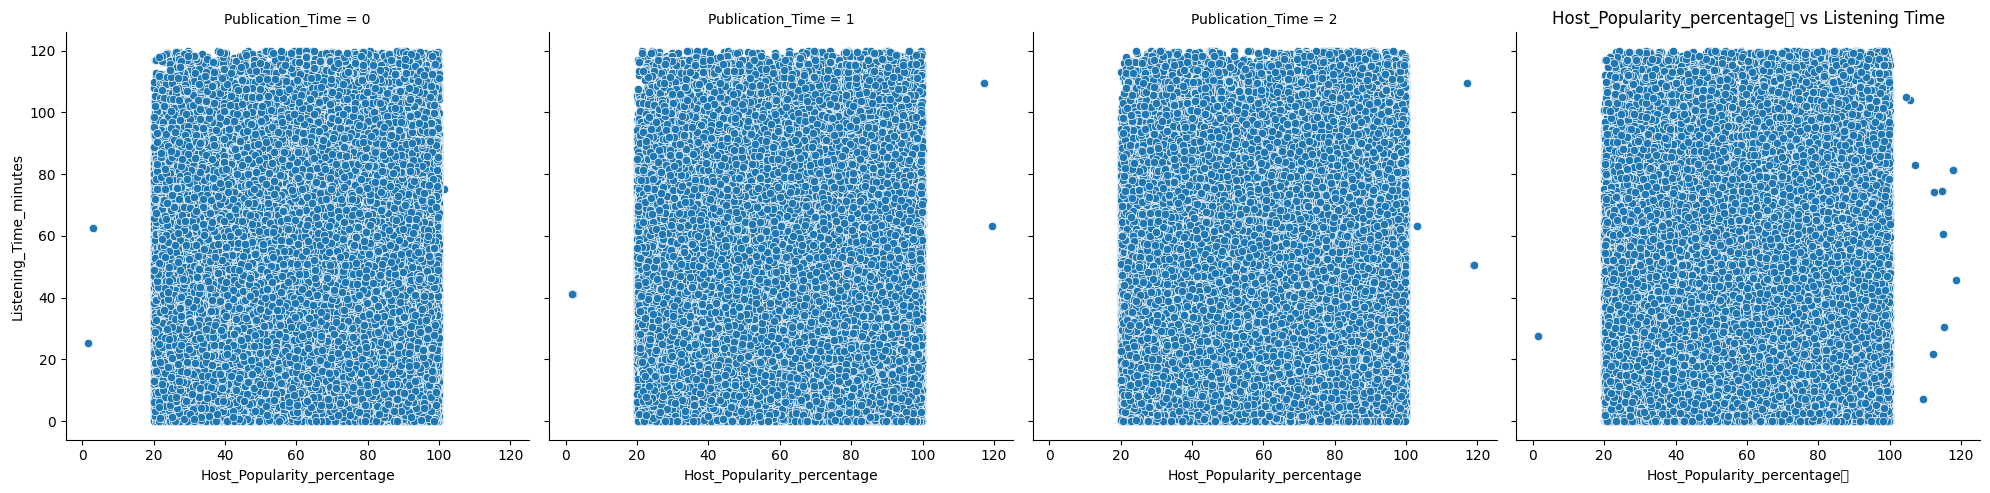

In [18]:
plt.figure(figsize=(6,6))
sns.relplot(x='Host_Popularity_percentage',y='Listening_Time_minutes',data=p_data,col='Publication_Time')
plt.title('Host_Popularity_percentage	 vs Listening Time')
plt.xlabel('Host_Popularity_percentage	')
plt.ylabel('Listening time')
plt.show()

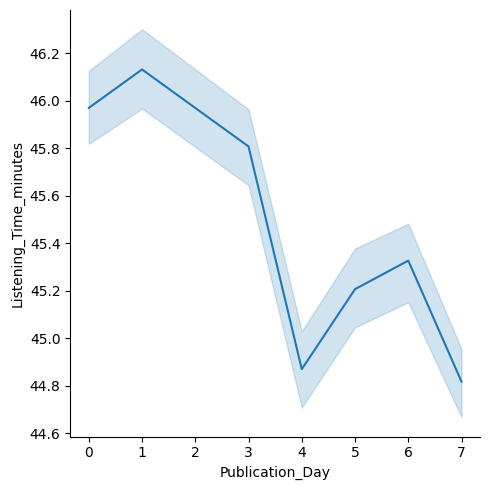

In [19]:
sns.relplot(x='Publication_Day',y='Listening_Time_minutes',data=p_data,kind='line')
plt.show()


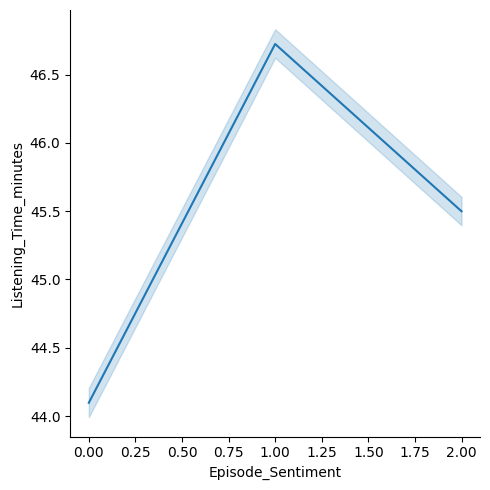

In [20]:
sns.relplot(x='Episode_Sentiment',y='Listening_Time_minutes',data=p_data,kind='line')
plt.show()

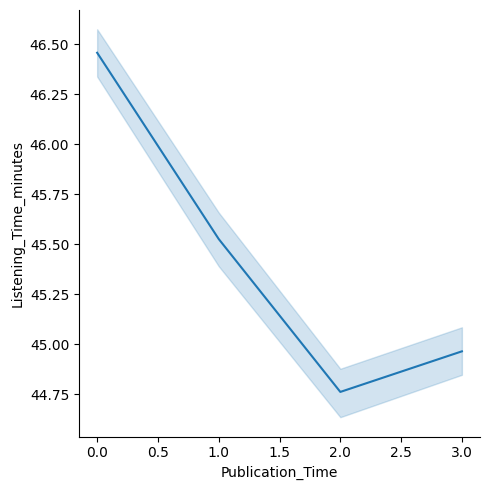

In [21]:
sns.relplot(x='Publication_Time',y='Listening_Time_minutes',data=p_data,kind='line')
plt.show()

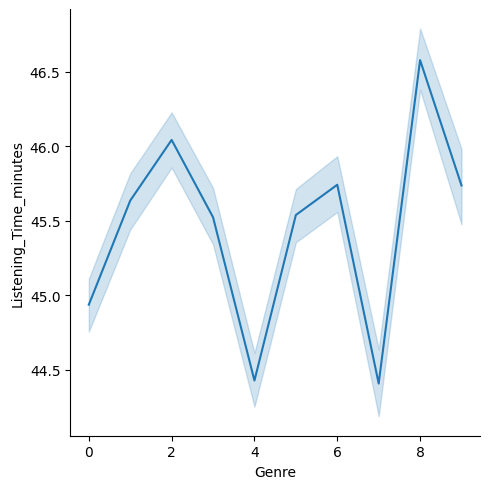

In [22]:
sns.relplot(x='Genre',y='Listening_Time_minutes',data=p_data,kind='line')
plt.show()

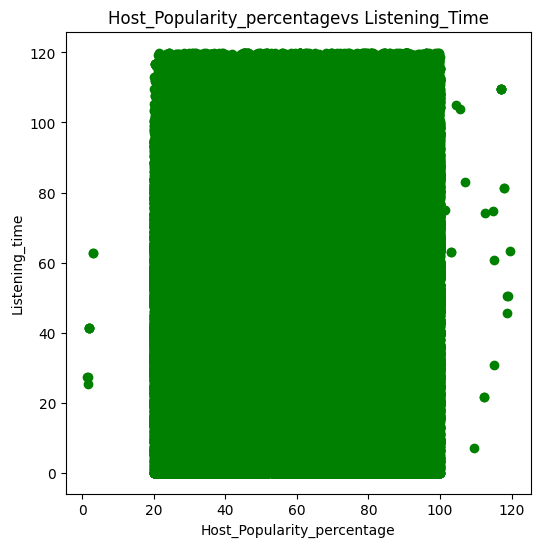

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(p_data['Host_Popularity_percentage'],p_data['Listening_Time_minutes'],color='green')
plt.title('Host_Popularity_percentagevs Listening_Time')
plt.xlabel('Host_Popularity_percentage')
plt.ylabel('Listening_time')
plt.show()

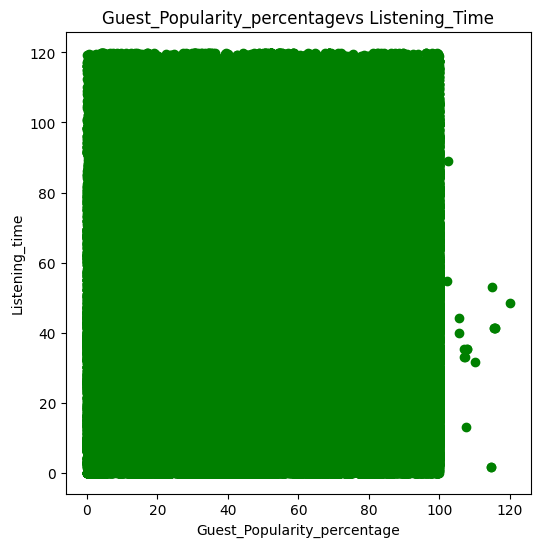

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(p_data['Guest_Popularity_percentage'],p_data['Listening_Time_minutes'],color='green')
plt.title('Guest_Popularity_percentagevs Listening_Time')
plt.xlabel('Guest_Popularity_percentage')
plt.ylabel('Listening_time')
plt.show()

In [25]:
correlation=p_data.corr()

In [26]:
correlation

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.008508,0.022179,-0.016385,-0.020868,-0.008265,-0.051885,0.024021,0.866032
Genre,0.008508,1.000000,0.011128,-0.000458,0.002781,-0.006325,0.008390,0.000413,0.004075
Host_Popularity_percentage,0.022179,0.011128,1.000000,0.001447,0.001822,0.020111,-0.017896,0.002912,0.050870
Publication_Day,-0.016385,-0.000458,0.001447,1.000000,-0.000734,0.004379,0.005720,-0.004214,-0.015306
Publication_Time,-0.020868,0.002781,0.001822,-0.000734,1.000000,0.000111,0.005582,0.003525,-0.022039
Guest_Popularity_percentage,-0.008265,-0.006325,0.020111,0.004379,0.000111,1.000000,0.007113,-0.005270,-0.014390
Number_of_Ads,-0.051885,0.008390,-0.017896,0.005720,0.005582,0.007113,1.000000,-0.002408,-0.118337
Episode_Sentiment,0.024021,0.000413,0.002912,-0.004214,0.003525,-0.005270,-0.002408,1.000000,0.021079
Listening_Time_minutes,0.866032,0.004075,0.050870,-0.015306,-0.022039,-0.014390,-0.118337,0.021079,1.000000


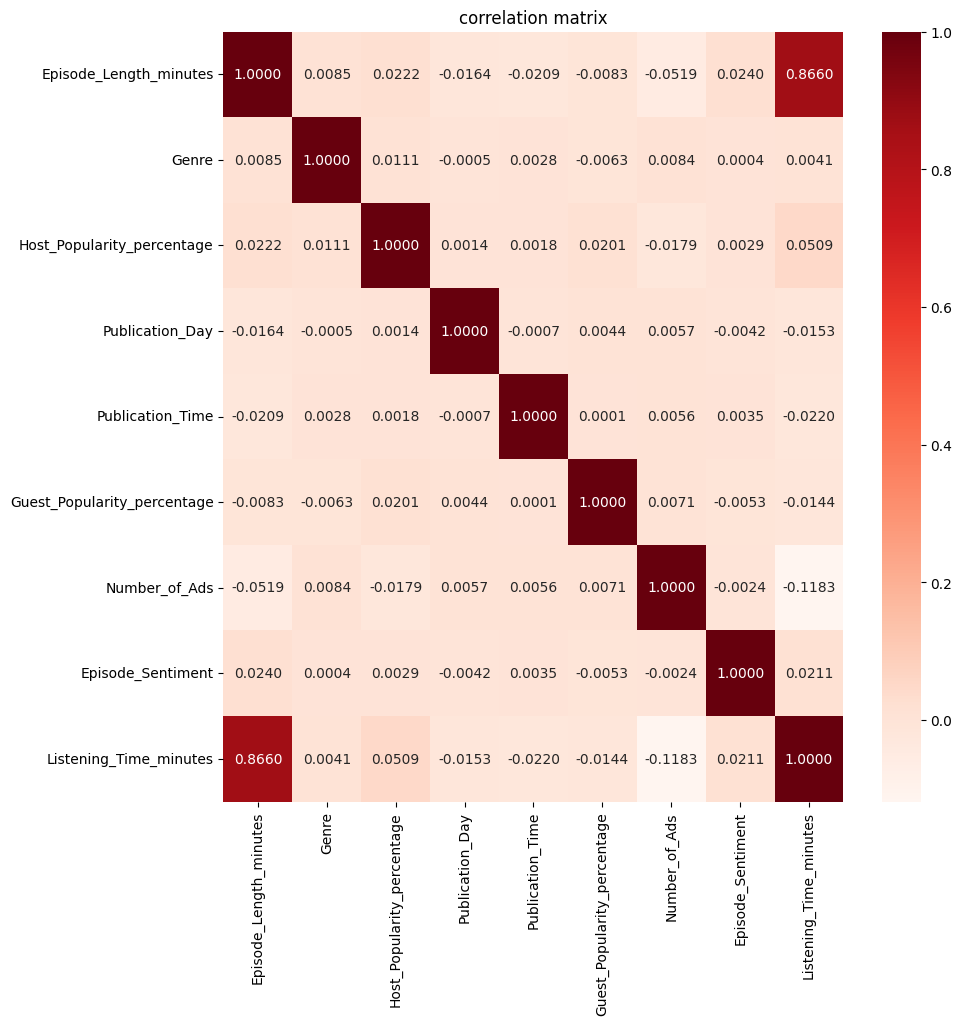

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cbar=True,fmt='.4f',cmap='Reds')
plt.title('correlation matrix')
plt.show()

# Predictive Model

In [28]:
#separating the data
x=p_data.drop(['Listening_Time_minutes'],axis=1)
y=p_data['Listening_Time_minutes']

In [29]:
x

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,64.504738,2,74.81,4,0,52.236449,0.0,1
1,119.800000,4,66.95,6,1,75.950000,2.0,0
2,73.900000,9,69.97,1,2,8.970000,0.0,0
3,67.170000,1,57.22,0,3,78.700000,2.0,1
4,110.510000,6,80.07,0,1,58.680000,3.0,2
...,...,...,...,...,...,...,...,...
749995,75.660000,9,69.36,6,3,52.236449,0.0,0
749996,75.750000,5,35.21,6,0,52.236449,2.0,2
749997,30.980000,3,78.58,4,3,84.890000,0.0,0
749998,108.980000,3,45.39,4,3,93.270000,0.0,0


In [30]:
y

,Listening_Time_minutes
0,31.41998
1,88.01241
2,44.92531
3,46.27824
4,75.61031
...,...
749995,56.87058
749996,45.46242
749997,15.26000
749998,100.72939


In [31]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(750000, 8) (600000, 8) (150000, 8)


In [33]:
models=({
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'XGBoost':XGBRegressor()
})

In [34]:
linearregression=LinearRegression()
linearregression.fit(x_train,y_train)
y_pred=linearregression.predict(x_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))

MSE: 181.3456510525042
MAE: 9.867390398856479
R2: 0.7535246056253283


In [35]:
xgboost=XGBRegressor()
xgboost.fit(x_train,y_train)
y_pred=xgboost.predict(x_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))


MSE: 172.20008982944685
MAE: 9.535971742984973
R2: 0.7659547675627553


In [37]:
decisiontree=DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)
y_pred=decisiontree.predict(x_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))


MSE: 325.32673876789875
MAE: 12.1220107492
R2: 0.557833144753893


# XGboost can be considered as best model among all as it can explain 76.59% of variance.

# Submission

In [44]:
input_data=(82.14,0,86.65,6,3,35.19,1.0,2) #dropping id,podcast name,episode no.
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=xgboost.predict(input_data_reshaped)
print('expected listening time:',prediction)


expected listening time: [60.497425]
